In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

### Imports
- Importeer numpy voor wiskundige functies.
- Importeer matplotlib onder de naam plt.
- Importeer make_cirles vanuit sklearn.datasets

Numpy is een bibliotheek die gebruikt kan worden voor wiskundige functionaliteiten.

Matplotlib is een bibliotheek die gebruikt wordt om grafieken mee te tekenen.

De make_cirles functie wordt geimporteerd vanuit de sklearn bibliotheek. Dit is een bibliotheek die functies bevat om datasets in te laden.

In [2]:
X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=0)

### Make Cirles
De make_cirles functie wordt hier aangeroepen met 1000 samples. De functie kan ook aangeroepen worden met een tuple. Hierin wordt dan aangegeven hoeveel samples de buitenste en binnenste cirkel moeten bevatten.

De noise die meegegeven wordt is de waarde voor de standaardafwijking die gebruikt wordt voor een Gaussian blur. Wanneer er niks wordt meegegeven voor de noise parameter vindt er geen blur plaats.

De factor die meegegeven wordt bepaald de schaling tussen de binneste en buitenste cirkel. De schaal wordt gegeven met een waarde van 0 tot 1.

De random_state die meegegeven wordt bepaald de reproduceerbaarheid van de functie. Wanneer deze waarde niet mee wordt gegeven zal de output van de functie over 2 aanroepen verschillend zijn. Door voor random_state een waarde te kiezen is de uitvoer reproduceerbaar.


In [3]:
X

array([[ 0.24265541,  0.0383196 ],
       [ 0.04433036, -0.05667334],
       [-0.78677748, -0.75718576],
       ...,
       [ 0.0161236 , -0.00548034],
       [ 0.20624715,  0.09769677],
       [-0.19186631,  0.08916672]])

### X
Door enkel X in te voeren wordt de waarde van X afgebeeld op het scherm. X staat hier voor de gegenereerde samplewaarden uit de make_circles functie.

In [4]:
X.shape

(1000, 2)

### X.shape
Door X.shape in te voeren wordt de waarde van X.shape afgebeeld op het scherm. De eerste waarde geeft aan hoeveel samples er in X aanwezig zijn.

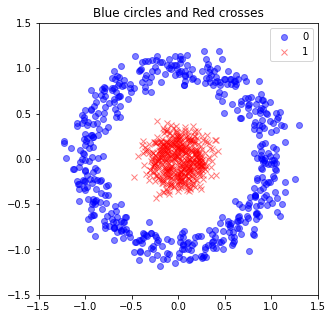

In [5]:
plt.figure(figsize=(5, 5))
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses");

### PLT
Hier wordt gebruik gemaakt van de eerder geimporteerde bibliotheek matplotlib.

De figure functie wordt aangeroepen met een grootte van 5 bij 5 voor de figuur. 
Vervolgens worden de punten geplot die zich op de buitenste cirkel bevinden.
Deze punten worden geplot in de kleur 'ob', dit geeft blauwe cirkels.

Hierna worden de punten geplot die zich op de binnenste cirkel bevinden. 
Deze punten worden geplot in de kleur 'xr', dit geeft rode kruisjes.

Verder wordt er in beide functie-aanroepen gebruik gemaakt van een alpha waarde. Dit is de alpa waarde die gebruikt wordt voor 'blending'. Deze waarde moet gegeven worden als getal tussen de 0 en 1.

Met xlim en ylim worden de limieten van de assen ingesteld.
Met de legend functie wordt een legenda getekend.
De title functie geeft een titel aan de grafiek.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### Imports
- importeer Sequential uit keras.models
- importeer Dense uit keras.layers
- importeer SGD uit keras.optimizers

Keras is een bibliotheek die gebruikt wordt voor machine learning.
Uit deze bibliotheek worden Sequential, Dense en SGD geimporteerd.

Sequential is een machine learning model waarbij er gebruik gemaakt wordt van 1 input tensor en 1 output tensor.

Dense is een laag waarin alle outputs zijn verbonden met alle neurons.

SGD is een gradient descent optimizer. Gradient descent is een iteratieve optimalisatie om de lokale minima te vinden van een n dimensionale output vector.

In [7]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=20, verbose=0);

### Model
Hier wordt een variabele aangemaakt die een Sequentieel model toegewezen krijgt.

Vervolgens wordt er een dense layer aan het model toegevoegd. Deze dense layer bestaat uit 4 neurons. De input shape doet (wat doet dit?). De activation zorgt ervoor dat een bepaalde activatiefunctie wordt gebruikt, in dit geval de tanh. De tanh functie wordt vaak gebruikt in backpropagation omdat de waardes die eruit komen genormaliseerd zijn tussen -1 en 1.

Hierna wordt een dense layer toegevoegd met 1 neuron en een ander soort activation. De sigmoid activation produceert altijd een output tussen 0 en 1. Deze functie wordt vaak gebruikt voor de output neuron.

Als laatste stap wordt het model opgebouwd en gefit.
De sgd wordt aangemaakt met een learning rate van 0.5.
De loss parameter wordt gezet op binary_crossentropy. Dit geeft aan op welke manier er wordt bepaald hoe accuraat het model is.
Accuracy wordt meegegeven bij het bouwen van het model om aan te geven dat we geintresseerd zijn in de accuracy metric.

Bij het fitten van het model worden eerst alle gegenereerde samplewaarden meegegeven. Daarna worden alle labels meegegeven. De epochs is een aantal iteraties dat het model getraint moet worden.


In [8]:
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

### Predict
De linespace functie geeft 101 gelijk verdeelde punten over een specifiek interval terug. 
Vervolgens wordt de meshgrid functie aangeroepen met deze gelijk verdeelde punten voor de horizontale en verticale as. De meshgrid functie geeft matrices terug.

Met c_ worden de 2 arrays met een concatenate aan elkaar verbonden.\
Vervolgens wordt met predict de output van het model berekend.

Als laatste stap wordt de prediction nog behandeld met een reshape operatie. Deze operatie zorgt ervoor dat de arrays van dezelfde dimensie, lengte en breedte zijn.


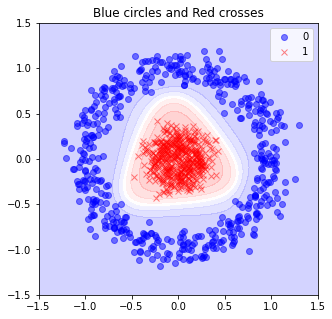

In [9]:
plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses");

### PLT
In de bovenstaande afbeelding is de prediction van het model weergegeven.
Zie voor uitleg over de weergave het stuk onder het eerdere kopje plt.